In [46]:
import pandas as pd
import numpy as np
#np.random.seed(1337)

import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from tensorflow import keras
from keras import backend as K
from tensorflow.keras.layers import Dense
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras import backend as K
from tensorflow.keras.models import Sequential

In [47]:
df = pd.read_csv('archive.zip' , nrows=50000)

In [48]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,28923.779620,-0.242344,0.010316,0.692829,0.185482,-0.258043,0.105202,-0.120580,0.053704,0.120198,...,-0.028909,-0.106878,-0.039899,0.008362,0.135912,0.020885,0.004915,0.004232,93.266587,0.002960
std,13116.563925,1.887731,1.629766,1.508700,1.400009,1.412611,1.311299,1.282493,1.223824,1.213120,...,0.736011,0.637858,0.589736,0.594216,0.439013,0.501260,0.388101,0.334785,253.010040,0.054326
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,21893.500000,-0.992599,-0.564348,0.216729,-0.721295,-0.867721,-0.635255,-0.606146,-0.146744,-0.614300,...,-0.231454,-0.529526,-0.178930,-0.321902,-0.127945,-0.330577,-0.063231,-0.006699,7.627500,0.000000
50%,33471.500000,-0.245008,0.078253,0.795902,0.191131,-0.289438,-0.150443,-0.077294,0.058736,0.010464,...,-0.068160,-0.082056,-0.051642,0.062302,0.175743,-0.071973,0.009035,0.022174,25.000000,0.000000
75%,38983.000000,1.155544,0.731591,1.430980,1.067868,0.283011,0.495431,0.423920,0.332187,0.815765,...,0.108087,0.307440,0.078620,0.401568,0.422121,0.300405,0.083875,0.076303,85.250000,0.000000
max,44299.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [49]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [50]:
df.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [51]:
df['Class'].value_counts()

0    49852
1      148
Name: Class, dtype: int64

<Axes: >

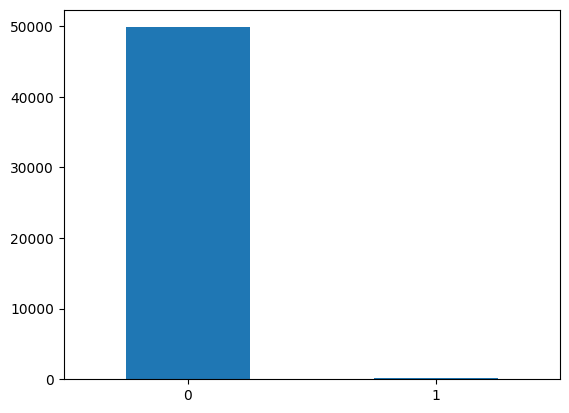

In [52]:
p = pd.value_counts(df['Class'], sort = True)
p.plot(kind = 'bar', rot=0)

In [53]:
df.shape

(50000, 31)

In [54]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [55]:
df=df.dropna(axis=0)

In [56]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [57]:
df.shape

(50000, 31)

<Axes: >

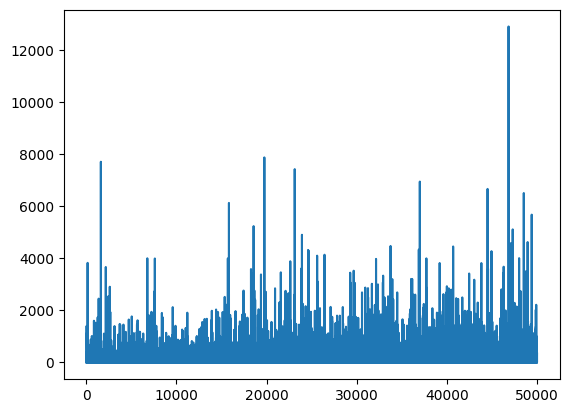

In [58]:
df['Amount'].plot()

In [59]:
Fraud = df[df['Class']==1]
Normal = df[df['Class']==0]

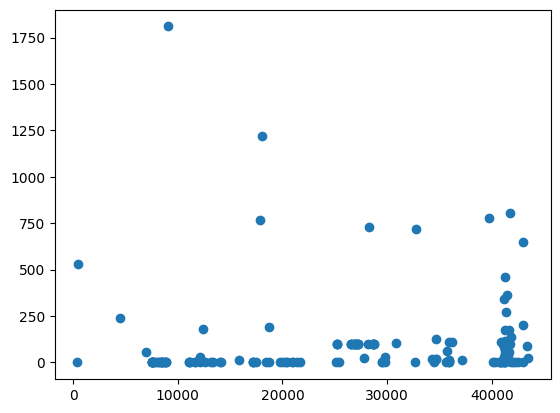

In [60]:
plt.scatter(Fraud.Time,Fraud.Amount)

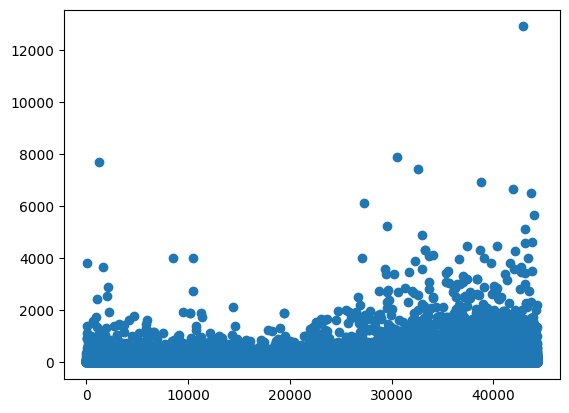

In [61]:
plt.scatter(Normal.Time,Normal.Amount)

In [62]:
scaler = MinMaxScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [63]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.011589,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000208,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.029329,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.009566,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.005421,0


In [64]:
corr = df.corr()

<Axes: >

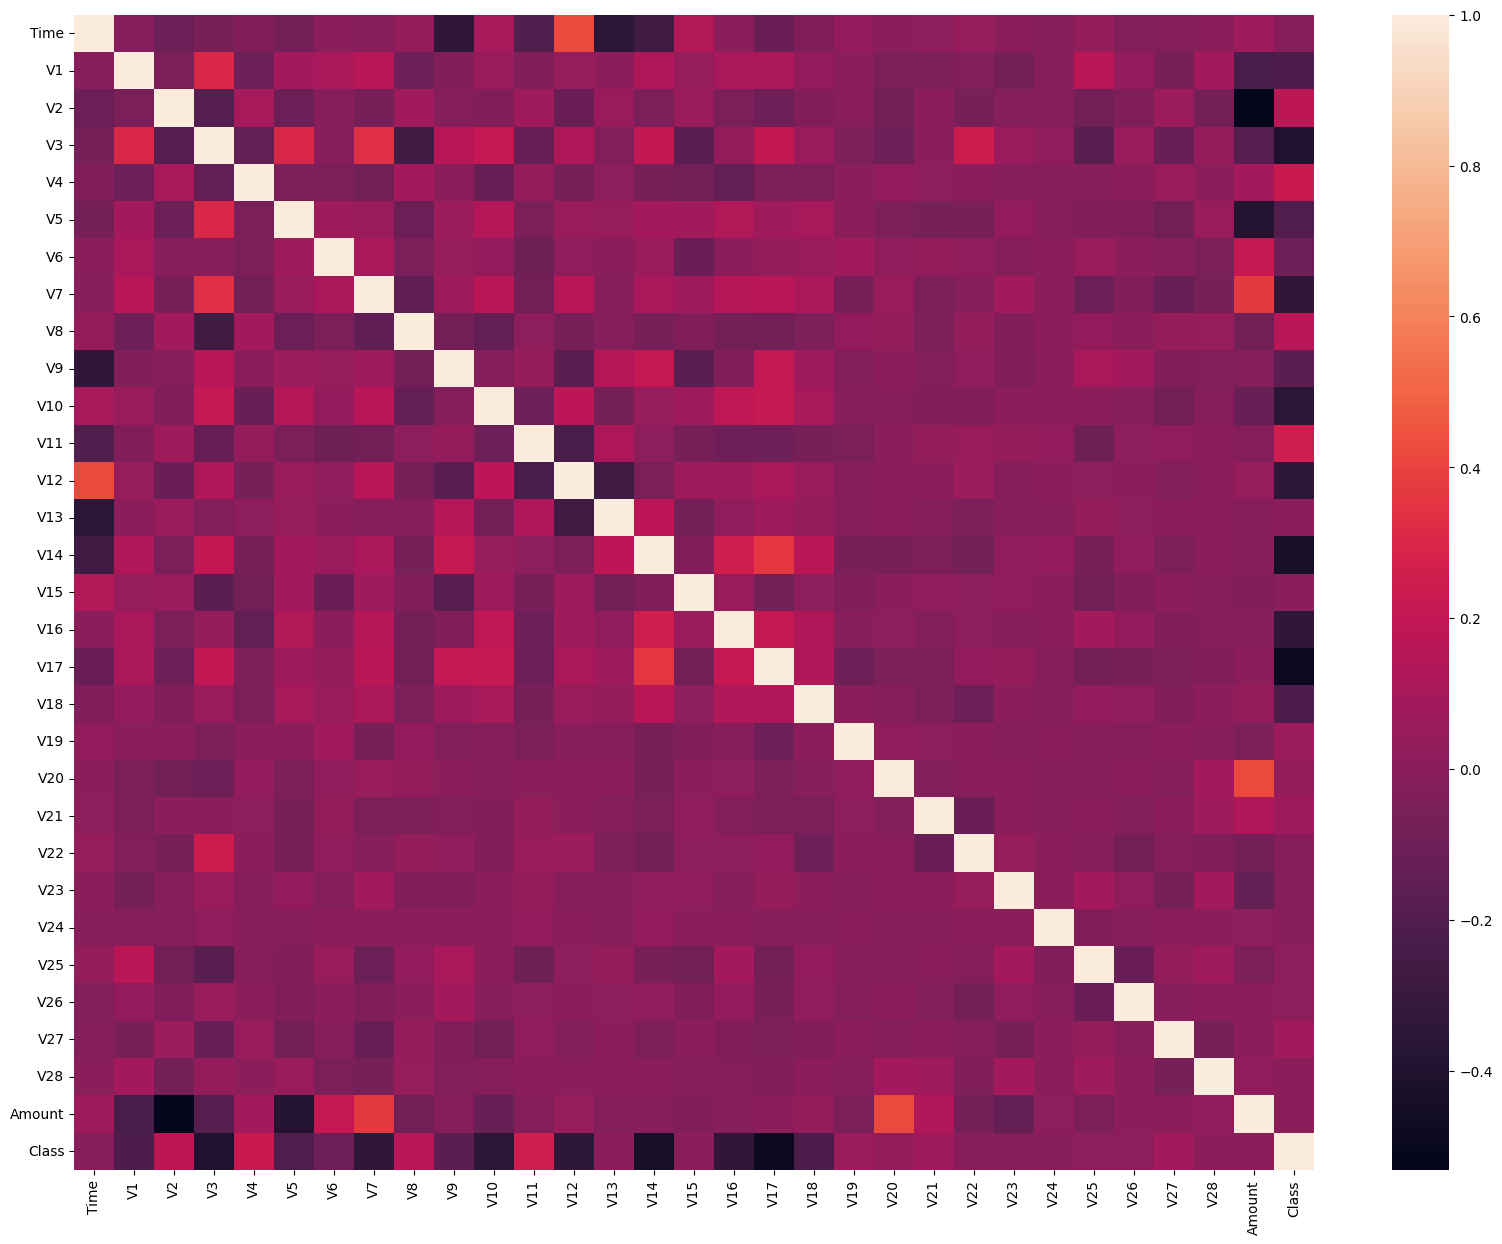

In [65]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr)

In [66]:
df=shuffle(df)

In [67]:
df_majority = df[df.Class==0]
df_minority = df[df.Class==1]

In [68]:
len(df_majority)

49852

In [69]:
len(df_minority)

148

In [70]:
df_minority_upsampled = resample(df_minority, replace=True,     # sample with replacement
                                 n_samples=100000,    # to match majority class
                                 random_state=123) # reproducible results

In [71]:
df_minority_upsampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42756,41233,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.000000,1
8845,12095,-4.727713,3.044469,-5.598354,5.928191,-2.190770,-1.529323,-4.487422,0.916392,-1.307010,...,0.650988,0.254983,0.628843,-0.238128,-0.671332,-0.033590,-1.331777,0.705698,0.002354,1
18773,29753,0.269614,3.549755,-5.810353,5.809370,1.538808,-2.269219,-0.824203,0.351070,-3.759059,...,0.371121,-0.322290,-0.549856,-0.520629,1.378210,0.564714,0.553255,0.402400,0.000053,1
15736,27163,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,-3.819832,...,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,0.007745,1
20198,30852,-2.830984,0.885657,1.199930,2.861292,0.321669,0.289966,1.767760,-2.451050,0.069736,...,0.546589,0.334971,0.172106,0.623590,-0.527114,-0.079215,-2.532445,0.311177,0.008118,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10497,17220,1.189784,0.942289,0.082334,3.024050,0.412406,-0.214415,0.053558,-0.110353,0.883798,...,-0.502636,-1.047398,-0.056752,-0.340688,0.541235,-0.098300,-0.003041,0.049819,0.000294,1
6882,8808,-4.617217,1.695694,-3.114372,4.328199,-1.873257,-0.989908,-4.577265,0.472216,0.472017,...,0.481830,0.146023,0.117039,-0.217565,-0.138776,-0.424453,-1.002041,0.890780,0.000085,1
10568,17520,-5.268053,9.067613,-15.960728,10.296603,-4.708241,-3.395375,-11.161057,5.499963,-5.667376,...,2.004110,0.191058,0.622928,-1.209264,-0.374799,0.648798,1.584697,0.720056,0.000077,1
16863,28242,-2.787248,-0.071340,-1.505288,3.361777,-3.357422,0.565835,0.303653,0.966914,-2.245882,...,0.882940,-0.246202,1.752227,0.219925,0.156282,-0.265894,0.220694,0.256077,0.056608,1


In [72]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [73]:
df_upsampled.Class.value_counts()

1    100000
0     49852
Name: Class, dtype: int64

In [74]:
features=df_upsampled.iloc[:,:-1]

In [75]:
labels=df_upsampled.iloc[:,30:31]

In [76]:
features,labels=shuffle(features,labels)

In [77]:
xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.2,stratify=labels,random_state=123)

In [78]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [79]:
model = Sequential()
model.add(Dense(128, input_dim=30, activation='relu'))
#model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy',f1_m,precision_m, recall_m])
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=15,batch_size=512,verbose=1)

Epoch 1/15
235/235 [==============================] - 2s 5ms/step - loss: 33.1326 - accuracy: 0.6697 - f1_m: 0.6996 - precision_m: 0.7930 - recall_m: 0.7579 - val_loss: 9.4173 - val_accuracy: 0.6717 - val_f1_m: 0.8024 - val_precision_m: 0.6704 - val_recall_m: 1.0000
Epoch 2/15
235/235 [==============================] - 1s 4ms/step - loss: 7.8553 - accuracy: 0.7770 - f1_m: 0.8332 - precision_m: 0.8731 - recall_m: 0.8468 - val_loss: 0.8625 - val_accuracy: 0.9293 - val_f1_m: 0.9449 - val_precision_m: 0.9827 - val_recall_m: 0.9101
Epoch 3/15
235/235 [==============================] - 1s 4ms/step - loss: 9.5513 - accuracy: 0.7912 - f1_m: 0.8433 - precision_m: 0.8809 - recall_m: 0.8557 - val_loss: 5.0672 - val_accuracy: 0.8589 - val_f1_m: 0.8824 - val_precision_m: 0.9914 - val_recall_m: 0.7953
Epoch 4/15
235/235 [==============================] - 2s 7ms/step - loss: 3.6982 - accuracy: 0.8525 - f1_m: 0.8938 - precision_m: 0.9150 - recall_m: 0.8953 - val_loss: 0.8281 - val_accuracy: 0.7999 - v

In [80]:
def visualize_model(history):
    plt.figure(figsize=(24,8))
    plt.subplot(1,2,1)
   # plt.plot(history.history["val_acc"],label="validation_accuracy",c="red",linewidth=4)
   # plt.plot(history.history["acc"],label="training_accuracy",c="green",linewidth=4)
    plt.legend()
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.plot(history.history["val_loss"],label="validation loss",c="red",linewidth=4)
    plt.plot(history.history["loss"],label="training_loss",c="green",linewidth=4)
    plt.legend()
    plt.grid(True)
    plt.suptitle("ACC / LOSS",fontsize=18)

    plt.show()

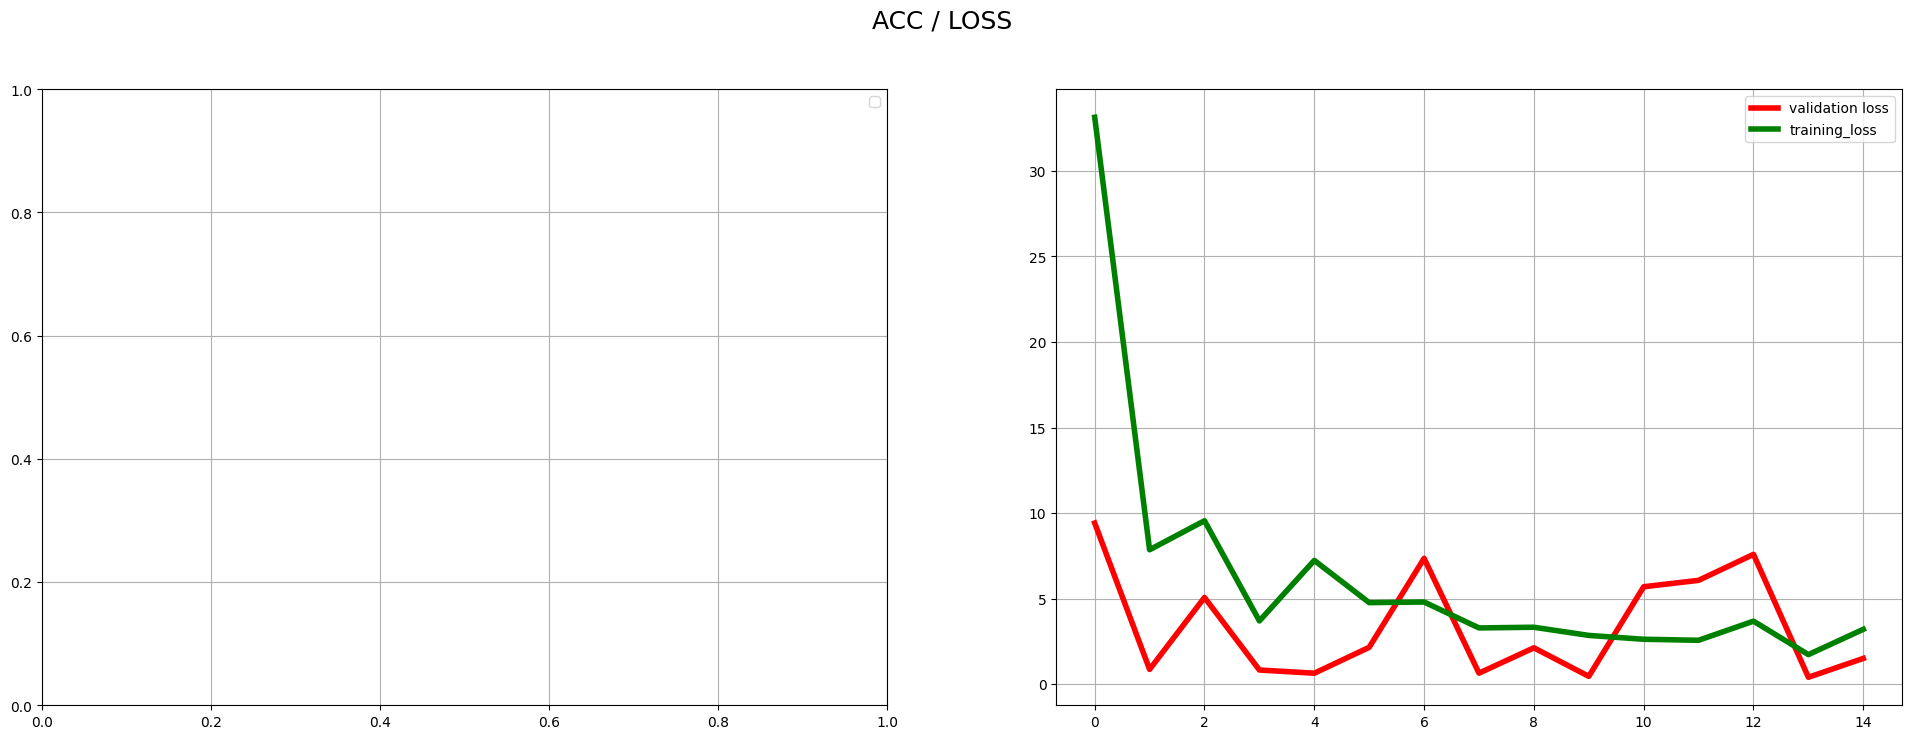

In [81]:
visualize_model(history)

In [82]:
loss, accuracy, f1_score, precision, recall = model.evaluate(xtest, ytest, verbose=1)

937/937 [==============================] - 2s 2ms/step - loss: 1.5057 - accuracy: 0.9461 - f1_m: 0.9570 - precision_m: 0.9869 - recall_m: 0.9309


In [83]:
model.save('keras_credit_card2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               3968      
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 8641 (33.75 KB)
Trainable params: 8641 (33.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
